In [1]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
import seaborn as sns

Read the files

In [2]:
tweets= pd.read_csv("english_tweets_updated.csv")

In [3]:
tweets_sentiment= pd.read_csv("pysentimiento_sentiment.csv") 

In [4]:
tweets_emotion= pd.read_csv("pysentimiento_emotion.csv")

In [10]:
tweets_sentiment["sentiment"][0]

'AnalyzerOutput(output=NEU, probas={NEU: 0.747, NEG: 0.241, POS: 0.012})'

In [11]:
# Extract probabilities
def extract_probabilities(row):
    probas = row.split("probas=")[-1].strip("{} )")
    probas_dict = dict(item.split(": ") for item in probas.split(", "))
    return pd.Series({k: float(v) for k, v in probas_dict.items()})

In [12]:
tweets_sentiment[["NEU", "NEG", "POS"]] = tweets_sentiment["sentiment"].apply(extract_probabilities)

In [19]:
tweets_sentiment["output"] = tweets_sentiment["sentiment"].apply(
    lambda x: x.split("output=")[1].split(",")[0]
)

In [20]:
tweets_sentiment.head()

,Unnamed: 0,sentiment,NEU,NEG,POS,output
0,0,"AnalyzerOutput(output=NEU, probas={NEU: 0.747,...",0.747,0.241,0.012,NEU
1,1,"AnalyzerOutput(output=NEU, probas={NEU: 0.778,...",0.778,0.007,0.215,NEU
2,2,"AnalyzerOutput(output=NEG, probas={NEG: 0.965,...",0.033,0.965,0.002,NEG
3,3,"AnalyzerOutput(output=NEG, probas={NEG: 0.974,...",0.023,0.974,0.003,NEG
4,4,"AnalyzerOutput(output=NEG, probas={NEG: 0.928,...",0.068,0.928,0.005,NEG


Scatter plot

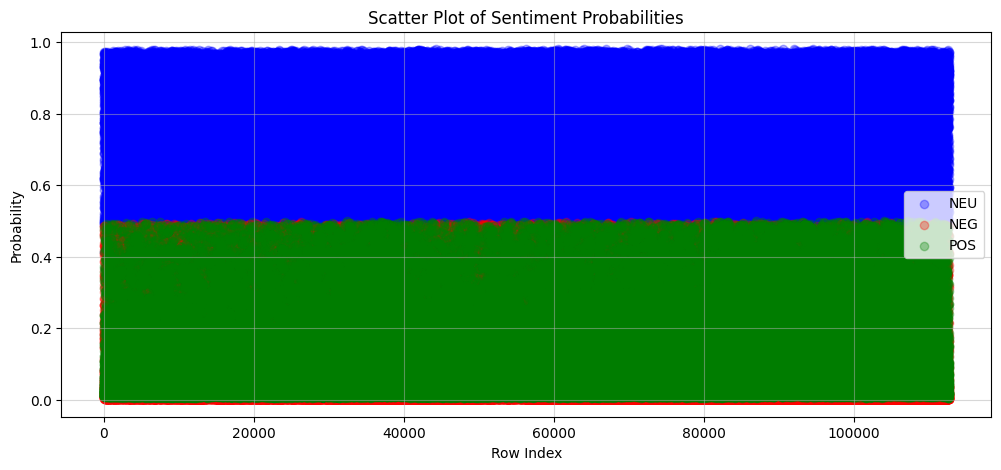

In [27]:
# Data for plotting
fig, ax= plt.subplots(1,1)
fig.set_size_inches(12,5)

# filter the values from output
new_data = tweets_sentiment[tweets_sentiment["output"] == "NEU"]

rows = range(len(new_data))  # X-axis: row indices

# Scatter plot
plt.scatter(rows, new_data["NEU"], color="blue", label="NEU", alpha=0.3)
plt.scatter(rows, new_data["NEG"], color="red", label="NEG", alpha=0.3)
plt.scatter(rows, new_data["POS"], color="green", label="POS", alpha=0.3)

# Labels and legend
plt.xlabel("Row Index")
plt.ylabel("Probability")
plt.title("Scatter Plot of Sentiment Probabilities")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()